In [3]:
import scipy.stats as stats
import numpy as np
# Number of trials (coin flips)
def limit(n_flips, n_tails_observed):
    # Calculate the p-value
    p_tails_hypothesis = np.arange(0, 1, 0.001)
    p_value = []
    for i in p_tails_hypothesis:
        p_value.append(stats.binom_test(n_tails_observed, n_flips, i, alternative="two-sided"))
    p_value = np.array(p_value)
    p_tails_hypothesis = np.array(p_tails_hypothesis)
    p = p_tails_hypothesis[np.where(p_value >= 1-0.9)]
    return min(p), max(p)

def flip_coin(): # 0 is heads, 1 is tails
    import random
    coin = random.randint(0,1)
    return coin

def flip_coin_n_times(n):
    heads = 0
    tails = 0
    for i in range(n):
        if flip_coin() == 0:
            heads += 1
        else:
            tails += 1
    prob_heads = heads/n
    std = (prob_heads*(1-prob_heads)/n)**0.5
    CL = 1.64*std/np.sqrt(n) # 90% confidence interval
    lower ,upper = limit(n, heads)

    return prob_heads, std, CL, lower, upper

flip_coin_n_times(100)

/tmp/ipykernel_5363/2776612665.py:9: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value.append(stats.binom_test(n_tails_observed, n_flips, i, alternative="two-sided"))


(0.57, 0.04950757517794625, 0.008119242329183185, 0.486, 0.649)

/tmp/ipykernel_5363/2071369975.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value.append(stats.binom_test(n_tails_observed, n_flips, i, alternative="two-sided"))


Text(0, 0.5, 'p_value')

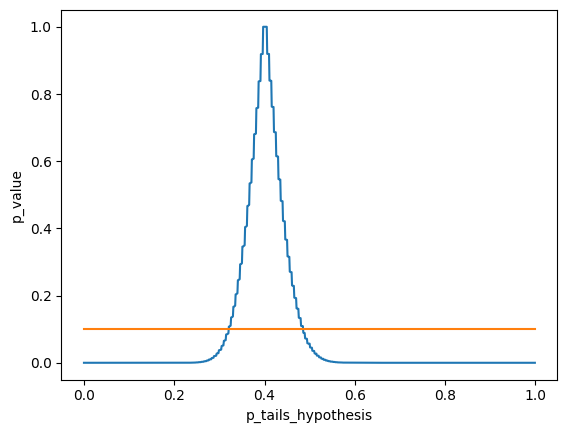

In [2]:
import matplotlib.pyplot as plt
n_tails_observed = 40
n_flips = 100
p_tails_hypothesis = np.arange(0, 1, 0.001)
p_value = []
for i in p_tails_hypothesis:
    p_value.append(stats.binom_test(n_tails_observed, n_flips, i, alternative="two-sided"))
plt.plot(p_tails_hypothesis, p_value)
plt.plot(p_tails_hypothesis, 1-0.9 * np.ones(len(p_tails_hypothesis)))
plt.xlabel('p_tails_hypothesis')
plt.ylabel('p_value')

(0.52, 0.67)